# Climate-Friendly Food Systems (CFFS) Labelling Project

### The University of British Columbia

***

## Part IV: Data Analysis

## Set up and Import Libraries

In [1]:
#pip install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import csv
from itertools import islice
from decimal import Decimal
import xml.etree.ElementTree as et
from xml.etree.ElementTree import parse
import openpyxl
import pytest
pd.set_option('mode.chained_assignment', None)

In [3]:
# RUN ONLY ONCE
# os.chdir is used to change the current directory to the specified path
os.chdir("../") # Sets path to the repo folder as it is one level above where this file exists!
path = os.getcwd()
print(path)

/Users/vivaanwadhwa/Documents/GitHub/CFFS_sharon_2024


***
## Import Cleaned Datasets

In [4]:
Items = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Items_List.csv"))
Items.dtypes

ItemId             object
Description        object
CaseQty           float64
CaseUOM            object
PakQty            float64
PakUOM             object
InventoryGroup     object
dtype: object

In [5]:
Items.head()

,ItemId,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup
0,I-7631,5 SPICE POWDER,1.0,ea,1.0,lb,SPICES
1,I-43851,AJWAIN 5LB,5.0,lb,454.0,g,SPICES
2,I-3617,ALLSPICE GROUND SHAKER,8.0,each,454.0,g,SPICES
3,I-1852,ALMOND BEV - ORIGINAL,24.0,CT,1.0,CT,BEVERAGE
4,I-44059,ALMOND BUTTER*,10.0,Kg,1.0,Kg,FOOD - GROCERY


In [6]:
Ingredients = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Ingredients_List.csv"))
Ingredients.dtypes

IngredientId     object
Qty             float64
Uom              object
Conversion      float64
InvFactor       float64
Recipe           object
dtype: object

In [7]:
Ingredients

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe
0,P-9857,5.0,Kg,1.000,1.1111,P-10112
1,P-48933,1.0,Kg,1.000,1.0000,P-10113
2,I-4626,16.0,CT,1.000,2.6667,P-10115
3,P-9755,1.0,lb,1.000,1.0000,P-10119
4,P-18746,1.0,Kg,1.000,1.0000,P-10241
...,...,...,...,...,...,...
5492,I-22493,5.0,g,0.001,1.0000,R-73668
5493,P-26514,2.0,g,1.000,1.0000,R-73668
5494,P-44913,90.0,g,0.001,1.0000,R-73668
5495,P-50725,1.0,ea,1.000,1.0000,R-73668


In [8]:
Ingredients.head()

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe
0,P-9857,5.0,Kg,1.0,1.1111,P-10112
1,P-48933,1.0,Kg,1.0,1.0000,P-10113
2,I-4626,16.0,CT,1.0,2.6667,P-10115
3,P-9755,1.0,lb,1.0,1.0000,P-10119
4,P-18746,1.0,Kg,1.0,1.0000,P-10241


In [9]:
Preps = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Preps_List_Cleaned.csv"))
Preps.dtypes

PrepId             object
Description        object
PakQty            float64
PakUOM             object
InventoryGroup     object
StdQty            float64
StdUom             object
dtype: object

In [10]:
Preps.head()
Preps.shape

(903, 7)

In [11]:
Products = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Products_List.csv"))
Products.dtypes

ProdId         object
Description    object
SalesGroup     object
dtype: object

In [12]:
Products.head()

,ProdId,Description,SalesGroup
0,R-73669,DEL|smoothie| mango pineapple,GV - DELISH
1,R-56613,DEL|Smoothie|Almonds forever,GV - DELISH
2,R-44306,DEL|Smoothie|Banana Matcha,GV - DELISH
3,R-43697,DEL|Smoothie|Blueberry Boost,GV - DELISH
4,R-46074,DEL|Smoothie|Bna Almnd Buta,GV - DELISH


In [13]:
Conversions = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Conversions_Added.csv"))
Conversions.dtypes

ConversionId       object
Multiplier        float64
ConvertFromQty    float64
ConvertFromUom     object
ConvertToQty      float64
ConvertToUom       object
dtype: object

In [14]:
Conversions

,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,I-67659,0.008818,1.0,each,113.398,g
1,I-28697,0.005181,1.0,ea,193.000,g
2,I-47441,0.005181,1.0,ea,193.000,g
3,I-1905,0.012500,1.0,CT,80.000,g
4,I-47440,0.005051,1.0,ea,198.000,g
...,...,...,...,...,...,...
1345,I-1119p,1.000000,1.0,CT,0.000,g
1346,I-1004p,1.000000,1.0,CT,0.000,g
1347,I-1126p,1.000000,1.0,CT,0.000,g
1348,I-25121,1.000000,1.0,ea,0.000,g


In [15]:
mapping = pd.read_csv(os.path.join(os.getcwd(), "data", "mapping", "Mapping.csv"))
mapping.dtypes

ItemId                                                     object
CategoryID                                                float64
Description                                                object
CaseQty                                                   float64
CaseUOM                                                    object
PakQty                                                    float64
PakUOM                                                     object
InventoryGroup                                             object
Food Category_y                                            object
Active Total Supply Chain Emissions (kg CO2 / kg food)    float64
g N lost/kg product                                       float64
Land Use (m^2)                                            float64
Freshwater Withdrawals (L/FU)                             float64
Stress-Weighted Water Use (L/FU)                          float64
dtype: object

In [16]:
mapping

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Food Category_y,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
0,I-57545,1.0,CHUCK FLAT BONELESS FZN,3.30,Kg,1.00,Kg,MEAT,beef & buffalo meat,41.3463,329.5,0.12645,1677.2,61309.0
1,I-10869,1.0,BEEF STIRFRY COV FR,5.00,Kg,1.00,Kg,MEAT,beef & buffalo meat,41.3463,329.5,0.12645,1677.2,61309.0
2,I-7064,1.0,BEEF OUTSIDE FLAT AAA,1.00,Kg,1.00,Kg,MEAT,beef & buffalo meat,41.3463,329.5,0.12645,1677.2,61309.0
3,I-37005,1.0,BEEF MEATBALLS,4.54,Kg,1000.00,g,MEAT,beef & buffalo meat,41.3463,329.5,0.12645,1677.2,61309.0
4,I-37002,1.0,BEEF INSIDE ROUND SHAVED,9.00,Kg,1000.00,g,MEAT,beef & buffalo meat,41.3463,329.5,0.12645,1677.2,61309.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,I-1119p,61.0,WRAP FOIL 18X1000,1.00,CT,1.00,CT,BAKING-RAW INGREDIENTS,kitchen supplies,0.0000,0.0,0.00000,0.0,0.0
2987,I-1126p,61.0,WRAP FOIL 24X1000,1.00,CT,1.00,CT,BAKING-RAW INGREDIENTS,kitchen supplies,0.0000,0.0,0.00000,0.0,0.0
2988,I-1484,53.0,FLAVOURS COFFEE,4.00,L,2.41,Kg,BAKING-RAW INGREDIENTS,coffee,16.6995,2.7,0.02162,33.3,340.7
2989,I-72206,20.0,TOFU JUST SMOKE BULK,8.00,pak,225.00,g,FOOD - GROCERY,soybeans/tofu,1.7542,5.9,0.00414,6.6,32.4


In [17]:
# Check if there are any duplicates in the mapping dataframe, "ItemId" column? False is good.
check = mapping["ItemId"].duplicated().any()
check

False

In [18]:
mapping.loc[mapping["ItemId"] == 'I-62863']

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Food Category_y,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
1988,I-62863,59.0,CK|G&G|HMR|Meat Ball & Pasta.,1.0,ea,1.0,ea,PRODUCTION FOOD,manually adjusted,0.0,0.0,0.0,0.0,0.0


### Unit Converter

In [19]:
# Import standard unit conversion information for items
Std_Unit = pd.read_csv(os.path.join(os.getcwd(), "data", "external", "standard_conversions.csv"))
Std_Unit.head()

,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,4.92890,1,tsp,4.92890,ml
1,14.78700,1,Tbsp,14.78700,ml
2,946.35000,1,qt,946.35000,ml
3,473.17625,1,pt,473.17625,ml
4,28.34950,1,oz,28.34950,g


In [20]:
# Import list of prep that need convert uom to standard uom manually
Manual_PrepU = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "update", "Preps_UpdateUom.csv"))
Manual_PrepU.head()

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom
0,P-54697,LEMON|Wedge 1/8,8.0,each,PREP,84.0,g
1,P-35132,MARINATED|Lemon & Herb Chx,185.0,ea,PREP,24050.0,g
2,P-51992,YIELD|Bread|Sourdough 5/8,36.0,slice,NaN,1620.0,g
3,P-26234,BATCH|Roasted Garlic Bread,16.0,ea,PREP,1280.0,g
4,P-26170,GRILLED|NaanBread,1.0,ea,PREP,125.0,g


In [21]:
# Add unit conversion info for preps into converter
Prep_cov = Manual_PrepU[['PrepId', 'PakQty','PakUOM','StdQty','StdUom']]
Prep_cov.insert(1, "Multiplier", '')
Prep_cov.columns = Conversions.columns

# Prep_cov.loc['Multiplier'] = Prep_cov['ConvertFromQty']/Prep_cov['ConvertToQty']
for index, row in Prep_cov.iterrows():
    # print(Prep_cov.loc[index, 'ConvertFromQty'])
    Prep_cov.loc[index, 'Multiplier'] = Prep_cov.loc[index, 'ConvertFromQty']/Prep_cov.loc[index, 'ConvertToQty']
Prep_cov.head()
Prep_cov.tail()

,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
503,P-36563,0.0025,1.0,ea,400.00,g
504,P-73973,0.006893,6.0,srvg,870.49,g
505,P-73969,0.008392,12.0,ea,1430.00,g
506,P-73977,0.004528,6.0,srvg,1325.00,g
507,P-73970,0.009375,6.0,srvg,640.00,g


In [22]:
# Drop duplicates and concatenate DataFrames: Conversions and Prep_cov to make a DataFrame: frames
frames = [Conversions, Prep_cov]
Conversions = pd.concat(frames).reset_index(drop=True, inplace=False).drop_duplicates()
Conversions.tail()

,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
1853,P-36563,0.0025,1.0,ea,400.00,g
1854,P-73973,0.006893,6.0,srvg,870.49,g
1855,P-73969,0.008392,12.0,ea,1430.00,g
1856,P-73977,0.004528,6.0,srvg,1325.00,g
1857,P-73970,0.009375,6.0,srvg,640.00,g


In [23]:
# Seperate uoms that converted to 'ml' or 'g'
liquid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'ml', 'ConvertFromUom'].tolist()
solid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'g', 'ConvertFromUom'].tolist()

In [24]:
# Construct a standard unit converter
def std_converter(qty, uom):
    if uom in Std_Unit['ConvertFromUom'].tolist():
        multiplier = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'Multiplier']
        Qty = float(qty)*float(multiplier)
        Uom = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'ConvertToUom'].values[0]
    else:
        Qty = qty
        Uom = uom
    return (Qty, Uom)

In [25]:
# Test the std_converter
std_converter(0.25,'lb')

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/3899604546.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)*float(multiplier)


(113.398, 'g')

In [26]:
# Construct a unit converter for specific items
spc_cov = list(filter(None, Conversions['ConversionId'].tolist()))

def spc_converter(ingre, qty, uom):
    if uom in liquid_unit + solid_unit: #convert to std uom for ingredients has no specific convention instruction
        return std_converter(qty, uom)
    elif ingre in spc_cov: #convert to std uom for ingredients has specific convention instruction
        conversion = Conversions.loc[(Conversions['ConversionId'] == ingre) & (Conversions['ConvertFromUom'] == uom)
                                    & (Conversions['ConvertToUom'] == 'g')]
        conversion.drop_duplicates(subset=['ConversionId'], inplace = True)
        multiplier = conversion['Multiplier']
        if multiplier.empty:
            return std_converter(qty, uom)
        else: 
            #print(conversion)
            Qty = float(qty)/float(multiplier)
            Uom = conversion['ConvertToUom'].values[0]
            return (Qty, Uom)
    else:
        return std_converter(qty, uom)

In [27]:
spc_cov

['I-67659',
 'I-28697',
 'I-47441',
 'I-1905',
 'I-47440',
 'I-13327',
 'I-54484',
 'I-2501',
 'I-52609',
 'I-52636',
 'I-2772',
 'I-20347',
 'I-54756',
 'I-41251',
 'I-2833',
 'I-54761',
 'I-54755',
 'I-54759',
 'I-63749',
 'I-54758',
 'I-53847',
 'I-34313',
 'I-19639',
 'I-63683',
 'I-19700',
 'I-3902',
 'I-63690',
 'I-48660',
 'I-2546',
 'I-1727',
 'I-2118',
 'I-2778',
 'I-63698',
 'I-2116',
 'I-2120',
 'I-32271',
 'I-38717',
 'I-31549',
 'I-53226',
 'I-32265',
 'I-41807',
 'I-41805',
 'I-63977',
 'I-43988',
 'I-42899',
 'I-13970',
 'I-54757',
 'I-51331',
 'I-38957',
 'I-41804',
 'I-41800',
 'I-55664',
 'I-41803',
 'I-54483',
 'I-54482',
 'I-42194',
 'I-42203',
 'I-42202',
 'I-42201',
 'I-42200',
 'I-42197',
 'I-42204',
 'I-40471',
 'I-40472',
 'I-40473',
 'I-40474',
 'I-42196',
 'I-42199',
 'I-42198',
 'I-53014',
 'I-42210',
 'I-2768',
 'I-20879',
 'I-28641',
 'I-47441',
 'I-47440',
 'I-2501',
 'I-13327',
 'I-49783',
 'I-47430',
 'I-28685',
 'I-19910',
 'I-45537',
 'I-41375',
 'I-2

In [28]:
# Test the spc_converter
spc_converter('I-1120', 1, 'CT')

(1, 'CT')

In [29]:
spc_converter('P-35132', 1, 'ea')

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/1228884068.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)/float(multiplier)


(130.0, 'g')

## GHG Factors Calculation for Preps

In [30]:
# Created new columns with emissions factors
Preps['GHG Emission (g)'] = 0
Preps['GHG Emission(g)/StdUom'] = 0
Preps['N lost (g)'] = 0
Preps['N lost (g)/StdUom'] = 0
Preps['Freshwater Withdrawals (ml)'] = 0
Preps['Freshwater Withdrawals (ml)/StdUom'] = 0
Preps['Stress-Weighted Water Use (ml)'] = 0
Preps['Stress-Weighted Water Use (ml)/StdUom'] = 0
Preps['Land Use (m^2)'] = 0
Preps['Land Use (m^2)/StdUom'] = 0

In [31]:
Ingredients.head()

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe
0,P-9857,5.0,Kg,1.0,1.1111,P-10112
1,P-48933,1.0,Kg,1.0,1.0000,P-10113
2,I-4626,16.0,CT,1.0,2.6667,P-10115
3,P-9755,1.0,lb,1.0,1.0000,P-10119
4,P-18746,1.0,Kg,1.0,1.0000,P-10241


In [32]:
Preps.loc[Preps["PrepId"] == "P-67984"]

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom


In [33]:
Preps

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom
0,P-68207,24|BATCH|Poblano Pork Stew*,100.0,PTN,PREP,28800.0,g,0,0,0,0,0,0,0,0,0,0
1,P-61322,AIOLI|Pesto,4.0,L,ZDONT USE OK - PREP,4000.0,ml,0,0,0,0,0,0,0,0,0,0
2,P-46066,Almond Milk Yeild,900.0,ml,NaN,900.0,ml,0,0,0,0,0,0,0,0,0,0
3,P-8814,Aoli- RoastedGarlic Thyme,1.1,L,NaN,1100.0,ml,0,0,0,0,0,0,0,0,0,0
4,P-49605,APPLE|Cubed,75.0,g,NaN,75.0,g,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,P-54352,Garnish|Avocado Spinach Pasta,20.0,g,NaN,20.0,g,0,0,0,0,0,0,0,0,0,0
899,P-73667,PREP|Chili Crunch|SL,4.5,L,FEAST,4500.0,ml,0,0,0,0,0,0,0,0,0,0
900,P-73472,PREP|SALAD|Tomato CucMint|MED,6.0,Kg,NaN,6000.0,g,0,0,0,0,0,0,0,0,0,0
901,P-70825,PREP|Sliced Strawberry*,1.3,Kg,NaN,1300.0,g,0,0,0,0,0,0,0,0,0,0


In [34]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for items as ingredients only
def get_items_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    land = Preps.loc[index, "Land Use (m^2)"]
    #print('Index:', index, '\nIngres:\n', ingres)
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('I'):
            ghge = mapping.loc[mapping['ItemId'] == ingre, 'Active Total Supply Chain Emissions (kg CO2 / kg food)']
            nitro_fac = mapping.loc[mapping['ItemId'] == ingre, 'g N lost/kg product']
            water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Freshwater Withdrawals (L/FU)']
            str_water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Stress-Weighted Water Use (L/FU)']
            land_fac = mapping.loc[mapping["ItemId"] == ingre, "Land Use (m^2)"]
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                land += qty * float(land_fac)
            #print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
            #print(ghg, nitro, water, str_water)
            # print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
            # print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [35]:
for index, row in Preps.iterrows():
    get_items_ghge_prep(index , row)

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/3899604546.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)*float(multiplier)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/335586521.py:31: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ghg += qty*float(ghge)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/335586521.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nitro += qty*float(nitro_fac)/1000
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/335586521.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
 

In [36]:
mapping.loc[mapping["ItemId"] == "I-5012"]

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Food Category_y,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
720,I-5012,31.0,PEACH SLCD GRADE A IQF,2.0,bag,2.5,Kg,PRODUCE,other fruits,0.4306,2.7,0.00071,3.5,4.7


In [37]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for other preps as ingredients
def get_preps_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'Land Use (m^2)']
    
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P') and len(ingres) > 1:
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            land_fac = Preps.loc[Preps['PrepId'] == ingre, 'Land Use (m^2)/StdUom']
            #print(ghge)
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            # print(ingre, Qty, Uom, qty, qty*float(ghge))
            # print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    
    # most recently added
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [38]:
Preps["Freshwater Withdrawals (ml)"].unique()

array([1.88392800e+07, 1.36125000e+04, 1.00000000e+00, 1.10919000e+04,
       2.13409829e+04, 1.00600000e+04, 1.41578400e+06, 8.57615000e+05,
       1.07610000e+05, 5.15926000e+05, 1.25760000e+05, 0.00000000e+00,
       8.17850000e+04, 2.99989750e+06, 1.89250000e+04, 1.09622442e+04,
       8.87000000e+03, 9.53700000e+03, 9.37094850e+05, 1.53452950e+05,
       1.42500000e+04, 4.19200000e+06, 3.21239700e+06, 4.68900000e+03,
       8.40000000e+01, 1.60744850e+05, 3.64973000e+05, 2.09775000e+06,
       1.22020669e+05, 1.86200000e+04, 1.59600000e+04, 2.72500000e+05,
       2.71600000e+04, 1.68309700e+07, 1.81030000e+06, 1.81239890e+08,
       3.56525408e+04, 1.19472000e+05, 3.28221200e+05, 1.25760000e+04,
       1.82000000e+03, 2.56700000e+04, 1.81030000e+07, 7.62650000e+04,
       1.37582800e+07, 3.73769940e+06, 4.02250000e+04, 9.38342000e+04,
       3.98100000e+04, 1.18610435e+07, 2.85677500e+05, 2.90891400e+06,
       2.15184850e+06, 2.21271150e+06, 1.01017600e+06, 1.83750601e+06,
      

In [39]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for linked preps
def link_preps(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'Land Use (m^2)']
    
    # Added this print statement July 31
    # print('Index:', index, '\nIngres:\n', ingres)
    if len(ingres) == 1:
        ingre = ingres.iloc[0]['IngredientId']
        if ingre.startswith('P'):
            print(ingres)
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            # most recently added
            land_fac = Preps.loc[Preps['PrepId'] == ingre, "Land Use (m^2)/StdUom"]
            
            Qty = float(ingres.iloc[0]['Qty'])
            Uom = ingres.iloc[0]['Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg = qty*float(ghge)
#                 ghg = qty*ghge
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg = qty*float(ghge)
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            # print(ingre, ghge, Qty, Uom, qty, weight)
            # print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    # most recently added
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [40]:
for index, row in Preps.iterrows():
    link_preps(index, row)

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/3899604546.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)*float(multiplier)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/2769458276.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ghg = qty*float(ghge)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/2769458276.py:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nitro = qty*float(nitro_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/2769458276.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  wat

     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
1297      P-48877  6.0  Kg         1.0        1.0  P-49155
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2360      P-46492  1.0  Kg         1.0        1.0  P-57337
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2480      P-50295  500.0   g         1.0        1.0  P-61991
   IngredientId    Qty Uom  Conversion  InvFactor   Recipe
98      P-26514  500.0   g         1.0     1000.0  P-24750
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
1822      P-34084  20.0   g         1.0       10.0  P-51508
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2744      P-56490  10.0  Kg         1.0     1.1111  P-70741
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2437      P-56490  10.0  Kg         1.0     1.1765  P-58450
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2302      P-51130  145.0   g         1.0     1.0357  P-56717
     IngredientId   Qty Uom  Conversion  I

In [41]:
for index, row in Preps.iterrows():
    get_preps_ghge_prep(index, row)

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/7797307.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ghg += qty*float(ghge)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/7797307.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nitro += qty*float(nitro_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/7797307.py:39: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  water += qty*float(water_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/7797307.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  str_water += qty*

In [42]:
Preps

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom
0,P-68207,24|BATCH|Poblano Pork Stew*,100.0,PTN,PREP,28800.0,g,127737.660124,4.435335,2001.496960,0.069496,2.084561e+07,723.805892,5.846697e+08,20301.029773,284.928927,0.009893
1,P-61322,AIOLI|Pesto,4.0,L,ZDONT USE OK - PREP,4000.0,ml,4447.146143,1.111787,3.494847,0.000874,1.405460e+04,3.513651,5.748739e+05,143.718487,0.550408,0.000138
2,P-46066,Almond Milk Yeild,900.0,ml,NaN,900.0,ml,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.001111,1.000000e+00,0.001111,0.000000,0.000000
3,P-8814,Aoli- RoastedGarlic Thyme,1.1,L,NaN,1100.0,ml,1334.535700,1.213214,0.992950,0.000903,1.109190e+04,10.083545,3.624175e+05,329.470455,0.299620,0.000272
4,P-49605,APPLE|Cubed,75.0,g,NaN,75.0,g,65.174147,0.868989,0.491400,0.006552,2.134098e+04,284.546439,1.869972e+05,2493.296628,0.111020,0.001480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,P-54352,Garnish|Avocado Spinach Pasta,20.0,g,NaN,20.0,g,136.170500,6.808525,1.439000,0.071950,2.379600e+04,1189.800000,1.221644e+06,61082.200000,0.162850,0.008143
899,P-73667,PREP|Chili Crunch|SL,4.5,L,FEAST,4500.0,ml,13631.941007,3.029320,9.628001,0.002140,3.313485e+05,73.633003,2.193588e+07,4874.640174,55.648973,0.012366
900,P-73472,PREP|SALAD|Tomato CucMint|MED,6.0,Kg,NaN,6000.0,g,3146.048241,0.524341,38.538561,0.006423,3.664827e+05,61.080446,1.656510e+07,2760.849632,6.918892,0.001153
901,P-70825,PREP|Sliced Strawberry*,1.3,Kg,NaN,1300.0,g,3309.400000,2.545692,5.400000,0.004154,8.070000e+05,620.769231,3.249020e+07,24992.461538,1.400000,0.001077


In [43]:
Ingredients.loc[Ingredients["IngredientId"] == "P-50509"]

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe


In [44]:
Preps["GHG Emission (g)"].unique()

array([1.27737660e+05, 4.44714614e+03, 0.00000000e+00, 1.33453570e+03,
       6.51741466e+01, 1.51051960e+04, 2.17428144e+04, 8.10977200e+03,
       6.56370114e+02, 2.76032066e+04, 2.17155365e+03, 1.84078068e+03,
       3.91969922e+03, 2.80772109e+04, 3.67422071e+04, 1.16843493e+03,
       1.16556112e+04, 9.93531067e+02, 8.58132617e+03, 1.90255083e+03,
       6.96908574e+03, 5.31142220e+02, 7.31010988e+03, 7.72851652e+03,
       1.40541472e+04, 1.52250000e+04, 3.90062881e+04, 1.35640556e+04,
       2.07547036e+03, 3.73200988e+03, 1.88927332e+03, 2.99423159e+03,
       7.61250000e+03, 5.27297412e+03, 3.47697732e+05, 3.11000000e+03,
       2.24980000e+02, 4.17002949e+05, 2.05473450e+04, 1.14436812e+06,
       1.29487103e+02, 2.08394458e+03, 5.18352546e+03, 4.56750000e+01,
       1.79905312e+04, 5.59009000e+03, 9.97422186e+04, 7.67130000e+03,
       7.65034233e+04, 4.64340383e+04, 2.28363960e+03, 1.58655375e+04,
       8.38956511e+04, 1.31733942e+04, 1.53315625e+04, 7.35347600e+03,
      

In [45]:
path = os.path.join(os.getcwd(), "data", "final", "Preps Footprints.csv")
Preps.to_csv(path, index = False, header = True)

## GHGe Calculation for Products

In [46]:
Products['Weight (g)'] = 0
Products['GHG Emission (g)'] = 0
Products['N lost (g)'] = 0
Products['Freshwater Withdrawals (ml)'] = 0
Products['Stress-Weighted Water Use (ml)'] = 0

# most recently added
Products['Land Use (m^2)'] = 0

In [47]:
Items["ItemId"].unique()

array(['I-7631', 'I-43851', 'I-3617', 'I-1852', 'I-44059', 'I-43854',
       'I-43652', 'I-2852', 'I-2853', 'I-6924', 'I-11181', 'I-4255',
       'I-29389', 'I-4458', 'I-13253', 'I-18918', 'I-4971', 'I-4465',
       'I-4472', 'I-4973', 'I-65741', 'I-27410', 'I-63697', 'I-1252',
       'I-1207', 'I-18089', 'I-4495', 'I-4496', 'I-4491', 'I-3119',
       'I-22443', 'I-4507', 'I-3130', 'I-3133', 'I-3141', 'I-3310',
       'I-38906', 'I-53706', 'I-3619', 'I-2567', 'I-2866', 'I-23336',
       'I-3143', 'I-4518', 'I-3144', 'I-7935', 'I-3145', 'I-3146',
       'I-10616', 'I-3743', 'I-3149', 'I-34065', 'I-3838', 'I-37002',
       'I-3846', 'I-7064', 'I-17670', 'I-11661', 'I-72216', 'I-3867',
       'I-4521', 'I-13050', 'I-32246', 'I-7185', 'I-4531', 'I-2574',
       'I-43648', 'I-4538', 'I-41921', 'I-73416', 'I-73415', 'I-4546',
       'I-31126', 'I-63874', 'I-67659', 'I-72414', 'I-63034', 'I-6020',
       'I-8060', 'I-4550', 'I-4558', 'I-4557', 'I-4556', 'I-13635',
       'I-3159', 'I-3586', '

In [48]:
Products.head()

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml),Land Use (m^2)
0,R-73669,DEL|smoothie| mango pineapple,GV - DELISH,0,0,0,0,0,0
1,R-56613,DEL|Smoothie|Almonds forever,GV - DELISH,0,0,0,0,0,0
2,R-44306,DEL|Smoothie|Banana Matcha,GV - DELISH,0,0,0,0,0,0
3,R-43697,DEL|Smoothie|Blueberry Boost,GV - DELISH,0,0,0,0,0,0
4,R-46074,DEL|Smoothie|Bna Almnd Buta,GV - DELISH,0,0,0,0,0,0


In [49]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for items ingredients only
def get_items_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index, 'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']

    # most recently added
    land = Products.loc[index, "Land Use (m^2)"]

    # print('Index:', index, '\nIngres:\n', ingres)
    
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx, 'IngredientId']
        
        # Check if the ingredient is present in the mapping
        mapping_ingre = mapping.loc[mapping['ItemId'] == ingre]
        if not mapping_ingre.empty:
            ghge = mapping_ingre['Active Total Supply Chain Emissions (kg CO2 / kg food)'].iloc[0]
            nitro_fac = mapping_ingre['g N lost/kg product'].iloc[0]
            water_fac = mapping_ingre['Freshwater Withdrawals (L/FU)'].iloc[0]
            str_water_fac = mapping_ingre['Stress-Weighted Water Use (L/FU)'].iloc[0]
            land_fac = mapping_ingre["Land Use (m^2)"].iloc[0]

            Qty = float(ingres.loc[idx, 'Qty'])
            Uom = ingres.loc[idx, 'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
            else:
                qty = std_converter(Qty, Uom)[0]

            weight += qty
            ghg += qty * float(ghge)
            nitro += qty * float(nitro_fac) / 1000
            water += qty * float(water_fac)
            str_water += qty * float(str_water_fac)
            land += qty * float(land_fac)

    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [50]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for preps ingredients only
def get_preps_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, "Land Use (m^2)"]
    
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P'):
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            # most recently added
            land_fac = Preps.loc[Preps["PrepId"] == ingre, "Land Use (m^2)/StdUom"]
            
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
                
            # print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [51]:
Ingredients

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe
0,P-9857,5.0,Kg,1.000,1.1111,P-10112
1,P-48933,1.0,Kg,1.000,1.0000,P-10113
2,I-4626,16.0,CT,1.000,2.6667,P-10115
3,P-9755,1.0,lb,1.000,1.0000,P-10119
4,P-18746,1.0,Kg,1.000,1.0000,P-10241
...,...,...,...,...,...,...
5492,I-22493,5.0,g,0.001,1.0000,R-73668
5493,P-26514,2.0,g,1.000,1.0000,R-73668
5494,P-44913,90.0,g,0.001,1.0000,R-73668
5495,P-50725,1.0,ea,1.000,1.0000,R-73668


In [52]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml),Land Use (m^2)
0,R-73669,DEL|smoothie| mango pineapple,GV - DELISH,0,0,0,0,0,0
1,R-56613,DEL|Smoothie|Almonds forever,GV - DELISH,0,0,0,0,0,0
2,R-44306,DEL|Smoothie|Banana Matcha,GV - DELISH,0,0,0,0,0,0
3,R-43697,DEL|Smoothie|Blueberry Boost,GV - DELISH,0,0,0,0,0,0
4,R-46074,DEL|Smoothie|Bna Almnd Buta,GV - DELISH,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
397,R-72778,SL|BBQ Porkchop|AAD,GV SIMPLY LOCAL,0,0,0,0,0,0
398,R-72819,SL|Lemon Pepper Chichen|AAD,GV SIMPLY LOCAL,0,0,0,0,0,0
399,R-70824,DEL|Strawberry Salad|AAD*,GV - DELISH,0,0,0,0,0,0
400,R-46347,FF|Pasta|Avocado Spin old,GV FRESH FARE DAY,0,0,0,0,0,0


In [53]:
Products["ProdId"].unique()

array(['R-73669', 'R-56613', 'R-44306', 'R-43697', 'R-46074', 'R-55185',
       'R-44591', 'R-73662', 'R-36817', 'R-56680', 'R-40466', 'R-73665',
       'R-36763', 'R-73666', 'R-49036', 'R-73663', 'R-14085', 'R-37741',
       'R-47286', 'R-49029', 'R-49030', 'R-37809', 'R-54202', 'R-64951',
       'R-27275', 'R-65942', 'R-32886', 'R-43738', 'R-57179', 'R-36666',
       'R-36575', 'R-54039', 'R-55057', 'R-64398', 'R-65761', 'R-50333',
       'R-65513', 'R-40621', 'R-51215', 'R-67295', 'R-56895', 'R-64698',
       'R-55942', 'R-70058', 'R-70095', 'R-71818', 'R-44732', 'R-70057',
       'R-61853', 'R-61855', 'R-72313', 'R-66411', 'R-73481', 'R-69124',
       'R-73482', 'R-73480', 'R-47827', 'R-68821', 'R-58351', 'R-71988',
       'R-61911', 'R-36568', 'R-55234', 'R-56509', 'R-54608', 'R-47096',
       'R-55151', 'R-55148', 'R-36574', 'R-50694', 'R-35461', 'R-56719',
       'R-61875', 'R-56718', 'R-61874', 'R-65943', 'R-36669', 'R-36552',
       'R-44885', 'R-73539', 'R-73591', 'R-73549', 

In [54]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for other products ingredients
# UPDATED get_products_ghge FUNCTION to prevent error:

def get_products_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index, 'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, 'Land Use (m^2)']
    
    # print('Index:', index, '\nIngres:\n', ingres)
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx, 'IngredientId']
        if ingre.startswith('R'):
            mapping_ingre = Products.loc[Products['ProdId'] == ingre]
            if not mapping_ingre.empty:
                ghge = mapping_ingre['GHG Emission (g)'].iloc[0]
                nitro_fac = mapping_ingre['N lost (g)'].iloc[0]
                water_fac = mapping_ingre['Freshwater Withdrawals (ml)'].iloc[0]
                str_water_fac = mapping_ingre['Stress-Weighted Water Use (ml)'].iloc[0]
                
                # most recently added
                land_fac = mapping_ingre["Land Use (m^2)"].iloc[0]
                
                Weight = mapping_ingre['Weight (g)'].iloc[0]
                Qty = float(ingres.loc[idx, 'Qty'])
                ghg += Qty * float(ghge)
                nitro += Qty * float(nitro_fac)
                water += Qty * float(water_fac)
                str_water += Qty * float(str_water_fac)
                weight += Qty * float(Weight)
                # print(ingre, Qty, float(ghge), Qty*float(ghge))
                # print(ingre, Qty, float(ghge), Qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [55]:
for index, row in Products.iterrows():
    get_items_ghge(index, row)

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/1228884068.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)/float(multiplier)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/420666723.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '482.54500000000166' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Products.loc[index, 'GHG Emission (g)'] = float(ghg)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/420666723.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '85.0000000000003' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Products.loc[index, 'Weight (g)'] = float(weig

In [56]:
for index, row in Products.iterrows():
    get_preps_ghge(index, row)

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/148996685.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ghg += qty*float(ghge)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/148996685.py:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nitro += qty*float(nitro_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/148996685.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  water += qty*float(water_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/148996685.py:43: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  str_water

In [57]:
for index, row in Products.iterrows():
    get_products_ghge(index, row)

In [58]:
# Filter out products using preps with unknown units
Preps_Nonstd = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Preps_NonstdUom.csv"))
Preps_Nonstd

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom


In [59]:
def filter_products(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    #print(ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre in Preps_Nonstd['PrepId'].tolist():
            print(ingre, index, Products.loc[index,'ProdId'])
            Products.drop(index, inplace=True)
            break

In [60]:
for index, row in Products.iterrows():
    filter_products(index, row)

In [61]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml),Land Use (m^2)
0,R-73669,DEL|smoothie| mango pineapple,GV - DELISH,350.000000,77.151358,0.375085,589.465909,1.924756e+03,0.148062
1,R-56613,DEL|Smoothie|Almonds forever,GV - DELISH,71.000000,324.658690,1.122366,101867.375962,7.213845e+06,0.675339
2,R-44306,DEL|Smoothie|Banana Matcha,GV - DELISH,1.000000,0.780648,0.004219,196.851979,1.169875e+04,0.001520
3,R-43697,DEL|Smoothie|Blueberry Boost,GV - DELISH,1.000000,4.520079,0.018895,771.884078,3.231236e+04,0.003462
4,R-46074,DEL|Smoothie|Bna Almnd Buta,GV - DELISH,365.000000,169.432593,0.488466,2187.960465,1.286103e+05,0.549266
...,...,...,...,...,...,...,...,...,...
397,R-72778,SL|BBQ Porkchop|AAD,GV SIMPLY LOCAL,567.448791,2230.009194,27.571797,367966.499375,1.081444e+07,3.860930
398,R-72819,SL|Lemon Pepper Chichen|AAD,GV SIMPLY LOCAL,537.448791,1085.212787,20.981229,97044.290053,1.099585e+06,1.827651
399,R-70824,DEL|Strawberry Salad|AAD*,GV - DELISH,172.000000,277.780739,1.135580,63787.885931,3.653899e+06,0.552990
400,R-46347,FF|Pasta|Avocado Spin old,GV FRESH FARE DAY,355.000000,585.515496,5.328397,116783.884598,4.214337e+06,1.483992


In [62]:
#Preps that are also products
# preps_Products = ["P-26234", "P-72699", "P-36061", "P-43747", "P-56249", "P-26143", "P-71646", "P-71644", "P-71649", "P-71648", "P-71642", 
#                   "P-71645", "P-71647", "P-71643", "P-71650", "P-26170", "P-62502", "P-26631", "P-26310", "P-46824", "P-43606", "P-55098", 
#                   "P-43725", "P-43719", "P-43720", "P-43727", "P-72885", "P-32659", "P-53995", "P-71964", "P-72887", "P-62632", "P-57632", 
#                   "P-8196" , "P-6888" , "P-60797", "P-68205", "P-26205", "P-67686", "P-71659", "P-67685", "P-71664", "P-71657", "P-71661",
#                   "P-72051", "P-71996", "P-71658", "P-29020", "P-31111", "P-62520", "P-55167", "P-33911", "P-71641", "P-55818", "P-68100",
#                   "P-26225"] # OK
preps_Products = ["P-55167", "P-46824", "P-72728", "P-32244", "P-44753", "P-73472",
                  "P-73266", "P-73341"] # Gather
# preps_Products = ["P-56387", "P-67663", "P-71553", "P-56398", "P-67661", "P-41467", "P-67662", "P-67660", "P-67670", "P-45068", "P-71554", 
#                   "P-42353", "P-55167", "P-44528", "P-46824", "P-57404", "P-57323", "P-57317", "P-26062" , "P-33438", "P-35848"] # Feast
# preps_Products = ['P-25426', 'P-73972', 'P-74038', 'P-74043', 'P-73976', 'P-74042', 'P-74041', 'P-73974', 'P-73973', 'P-73978',
#                     'P-73969','P-74040','P-73971','P-74039','P-73977','P-74037', 'P-73970' ] #HARVEST FESTIVAL
#Items that are also products
# items_Products = ["I-2081", "I-19283", "I-13303"] #OK
items_Products = ["I-71938"] #Gather
# items_Products = ["I-57554", "I-1033"] #Feast
Preps_Products = Preps.loc[Preps["PrepId"].isin(preps_Products)]
Items_Products = mapping.loc[mapping["ItemId"].isin(items_Products)]
assert Preps_Products.shape[0] + Items_Products.shape[0] == len(preps_Products) + len(items_Products)
display(Preps_Products)
display(Items_Products.head(5))

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom
196,P-44753,COOKED|Veg|Ginger Garlic Broc,1.0,Kg,NaN,1000.0,g,8.261104e+02,0.826110,11.605240,0.011605,7.547955e+04,75.479546,3.482913e+06,3482.912670,3.050553,0.003051
315,P-55167,HS|Pasta Bar Protien|BV Test,120.0,g,NaN,120.0,g,1.054901e+03,8.790838,17.496016,0.145800,1.594235e+05,1328.529299,4.090095e+06,34084.125331,2.399935,0.019999
348,P-46824,MIX|Pasta Bar Vegetables,180.0,g,NaN,180.0,g,4.378242e+01,0.243236,0.474840,0.002638,4.883880e+03,27.132667,1.764271e+05,980.150667,0.137886,0.000766
439,P-73341,PREP|Dip|Tzatziki|MED*,4.2,L,PREP,4200.0,ml,1.284782e+04,3.059005,112.277673,0.026733,1.127118e+06,268.361357,5.490353e+07,13072.268096,11.734180,0.002794
473,P-72728,PREP|Lemongrass Pork Chop|SL,130.0,Kg,NaN,130000.0,g,1.385712e+06,10.659324,18655.025000,0.143500,2.537058e+08,1951.583154,7.603132e+09,58485.630154,2962.371000,0.022787
630,P-32244,SAUCE|Chipotle Mayo|GRL,1.0,L,PREP,1000.0,ml,3.107182e+03,3.107182,0.612000,0.000612,5.769000e+03,5.769000,1.733500e+05,173.350000,15.102200,0.015102
900,P-73472,PREP|SALAD|Tomato CucMint|MED,6.0,Kg,NaN,6000.0,g,3.146048e+03,0.524341,38.538561,0.006423,3.664827e+05,61.080446,1.656510e+07,2760.849632,6.918892,0.001153
902,P-73266,SALAD|QuinoaTabbouleh|MED*,2.8,Kg,PREP,2800.0,g,2.888544e+03,1.031623,17.897109,0.006392,4.539390e+05,162.121076,1.115068e+07,3982.387031,8.409705,0.003003


,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Food Category_y,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
2890,I-71938,41.0,FRIES 3/8IN*CRINKLE,6.0,bag,5.0,lb,PRODUCE,potatoes,0.397,5.0,0.00052,2.6,78.3


In [63]:
Preps_Products.drop(columns=["PakQty", "PakUOM", "StdUom", "GHG Emission(g)/StdUom", 
                             "N lost (g)/StdUom", "Freshwater Withdrawals (ml)/StdUom", 
                             "Stress-Weighted Water Use (ml)/StdUom", "Land Use (m^2)/StdUom"], 
                    inplace=True)

# Rename columns in Preps_Products
Preps_Products.rename(columns={"StdQty": "Weight (g)", "PrepId": "ProdId", 
                               "InventoryGroup": "SalesGroup"}, inplace=True)

# Initialize "Weight (g)" column with 0 in Items_Products
Items_Products["Weight (g)"] = 0

# Assign specific weights based on "ItemId"
##MANUAL
Items_Products.loc[Items_Products["ItemId"] == "I-13303", "Weight (g)"] = 250
Items_Products.loc[Items_Products["ItemId"] == "I-19283", "Weight (g)"] = 50
Items_Products.loc[Items_Products["ItemId"] == "I-2081", "Weight (g)"] = 1000
Items_Products.loc[Items_Products["ItemId"] == "I-57554", "Weight (g)"] = 200
Items_Products.loc[Items_Products["ItemId"] == "I-1033", "Weight (g)"] = 85
Items_Products.loc[Items_Products["ItemId"] == "I-71938", "Weight (g)"] = 2267.96


for index,row in Items_Products.iterrows():
    Items_Products.loc[index, "Active Total Supply Chain Emissions (kg CO2 / kg food)"] = Items_Products.loc[index, "Active Total Supply Chain Emissions (kg CO2 / kg food)"] * Items_Products.loc[index, "Weight (g)"]
    Items_Products.loc[index, "g N lost/kg product"] = Items_Products.loc[index, "g N lost/kg product"] * Items_Products.loc[index, "Weight (g)"]
    Items_Products.loc[index, "Freshwater Withdrawals (L/FU)"] = Items_Products.loc[index, "Freshwater Withdrawals (L/FU)"] * Items_Products.loc[index, "Weight (g)"]
    Items_Products.loc[index, "Stress-Weighted Water Use (L/FU)"] = Items_Products.loc[index, "Stress-Weighted Water Use (L/FU)"] * Items_Products.loc[index, "Weight (g)"]
    Items_Products.loc[index, "Land Use (m^2)"] = Items_Products.loc[index, "Land Use (m^2)"] * Items_Products.loc[index, "Weight (g)"]

display(Items_Products)

# Drop unnecessary columns from Items_Products
Items_Products = Items_Products.drop(columns=["CaseQty", "CaseUOM", "PakQty", "PakUOM", 
                                              "CategoryID", "Food Category_y"])

# Rename columns in Items_Products
Items_Products.rename(columns={"ItemId": "ProdId", "InventoryGroup": "SalesGroup",
                               "Active Total Supply Chain Emissions (kg CO2 / kg food)" : "GHG Emission (g)",
                               "g N lost/kg product": "N lost (g)", "Freshwater Withdrawals (L/FU)" : "Freshwater Withdrawals (ml)",
                               "Stress-Weighted Water Use (L/FU)" : "Stress-Weighted Water Use (ml)"}, inplace=True)

# Concatenate the three DataFrames into Products
Products = pd.concat([Products, Preps_Products, Items_Products], ignore_index=True)


/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_88162/3919195220.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2267.96' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Items_Products.loc[Items_Products["ItemId"] == "I-71938", "Weight (g)"] = 2267.96


,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Food Category_y,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU),Weight (g)
2890,I-71938,41.0,FRIES 3/8IN*CRINKLE,6.0,bag,5.0,lb,PRODUCE,potatoes,900.38012,11339.8,1.179339,5896.696,177581.268,2267.96


In [64]:
Products.tail(len(preps_Products) + 5)

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml),Land Use (m^2)
398,R-72819,SL|Lemon Pepper Chichen|AAD,GV SIMPLY LOCAL,537.448791,1.085213e+03,20.981229,9.704429e+04,1.099585e+06,1.827651
399,R-70824,DEL|Strawberry Salad|AAD*,GV - DELISH,172.000000,2.777807e+02,1.135580,6.378789e+04,3.653899e+06,0.552990
400,R-46347,FF|Pasta|Avocado Spin old,GV FRESH FARE DAY,355.000000,5.855155e+02,5.328397,1.167839e+05,4.214337e+06,1.483992
401,R-73668,FF|Toast|ChiliCrunCAvocado|AAD,GV FRESH FARE BREAKFAST,150.375000,1.527876e+02,0.482677,1.365199e+04,8.408810e+05,0.449985
402,P-44753,COOKED|Veg|Ginger Garlic Broc,NaN,1000.000000,8.261104e+02,11.605240,7.547955e+04,3.482913e+06,3.050553
403,P-55167,HS|Pasta Bar Protien|BV Test,NaN,120.000000,1.054901e+03,17.496016,1.594235e+05,4.090095e+06,2.399935
404,P-46824,MIX|Pasta Bar Vegetables,NaN,180.000000,4.378242e+01,0.474840,4.883880e+03,1.764271e+05,0.137886
405,P-73341,PREP|Dip|Tzatziki|MED*,PREP,4200.000000,1.284782e+04,112.277673,1.127118e+06,5.490353e+07,11.734180
406,P-72728,PREP|Lemongrass Pork Chop|SL,NaN,130000.000000,1.385712e+06,18655.025000,2.537058e+08,7.603132e+09,2962.371000
407,P-32244,SAUCE|Chipotle Mayo|GRL,PREP,1000.000000,3.107182e+03,0.612000,5.769000e+03,1.733500e+05,15.102200


In [65]:
Products['Freshwater Withdrawals (L)'] = round(Products['Freshwater Withdrawals (ml)']/1000, 2)
Products['Stress-Weighted Water Use (L)'] = round(Products['Stress-Weighted Water Use (ml)']/1000, 2)
Products = Products.drop(columns=['Freshwater Withdrawals (ml)', 'Stress-Weighted Water Use (ml)'])

In [66]:
Products['GHG Emission (g) / 100g'] = round(100*Products['GHG Emission (g)']/Products['Weight (g)'], 2)
Products['N lost (g) / 100g'] = round(100*Products['N lost (g)']/Products['Weight (g)'], 2)
Products['Freshwater Withdrawals (L) / 100g'] = round(100*Products['Freshwater Withdrawals (L)']/Products['Weight (g)'], 2)
Products['Stress-Weighted Water Use (L) / 100g'] = round(100*Products['Stress-Weighted Water Use (L)']/Products['Weight (g)'], 2)

# most recently added
Products['Land Use (m^2) / 100g'] = round(100 * Products['Land Use (m^2)'] / Products['Weight (g)'], 2)

In [67]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g
0,R-73669,DEL|smoothie| mango pineapple,GV - DELISH,350.00,7.715136e+01,0.375085,0.148062,0.59,1.92,22.04,0.11,0.17,0.55,0.04
1,R-56613,DEL|Smoothie|Almonds forever,GV - DELISH,71.00,3.246587e+02,1.122366,0.675339,101.87,7213.85,457.27,1.58,143.48,10160.35,0.95
2,R-44306,DEL|Smoothie|Banana Matcha,GV - DELISH,1.00,7.806481e-01,0.004219,0.001520,0.20,11.70,78.06,0.42,20.00,1170.00,0.15
3,R-43697,DEL|Smoothie|Blueberry Boost,GV - DELISH,1.00,4.520079e+00,0.018895,0.003462,0.77,32.31,452.01,1.89,77.00,3231.00,0.35
4,R-46074,DEL|Smoothie|Bna Almnd Buta,GV - DELISH,365.00,1.694326e+02,0.488466,0.549266,2.19,128.61,46.42,0.13,0.60,35.24,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,P-72728,PREP|Lemongrass Pork Chop|SL,NaN,130000.00,1.385712e+06,18655.025000,2962.371000,253705.81,7603131.92,1065.93,14.35,195.16,5848.56,2.28
407,P-32244,SAUCE|Chipotle Mayo|GRL,PREP,1000.00,3.107182e+03,0.612000,15.102200,5.77,173.35,310.72,0.06,0.58,17.34,1.51
408,P-73472,PREP|SALAD|Tomato CucMint|MED,NaN,6000.00,3.146048e+03,38.538561,6.918892,366.48,16565.10,52.43,0.64,6.11,276.08,0.12
409,P-73266,SALAD|QuinoaTabbouleh|MED*,PREP,2800.00,2.888544e+03,17.897109,8.409705,453.94,11150.68,103.16,0.64,16.21,398.24,0.30


In [68]:
Products.shape

(411, 14)

In [69]:
path = os.path.join(os.getcwd(), "data", "final", "Recipes Footprints.csv")
Products.to_csv(path, index = False, header = True)

## Data Visualization

In [70]:
path = os.path.join(os.getcwd(), "reports", "figures/")

<Axes: >

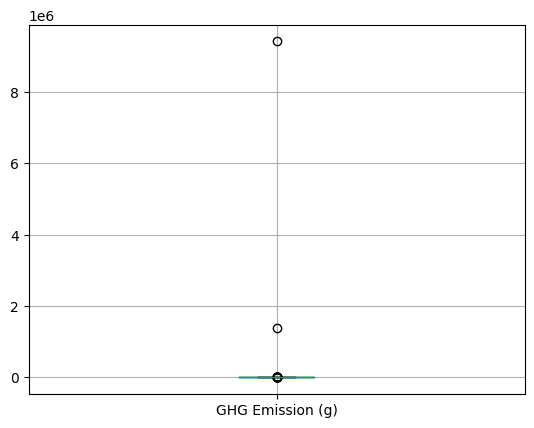

In [71]:
Products.boxplot(column=['GHG Emission (g)'], return_type='axes')

In [72]:
Products.boxplot(column=['N lost (g)'], return_type='axes')

<Axes: >

In [73]:
Products.boxplot(column=['Freshwater Withdrawals (L)'], return_type='axes')

<Axes: >

In [74]:
Products.boxplot(column=['Stress-Weighted Water Use (L)'], return_type='axes')

<Axes: >

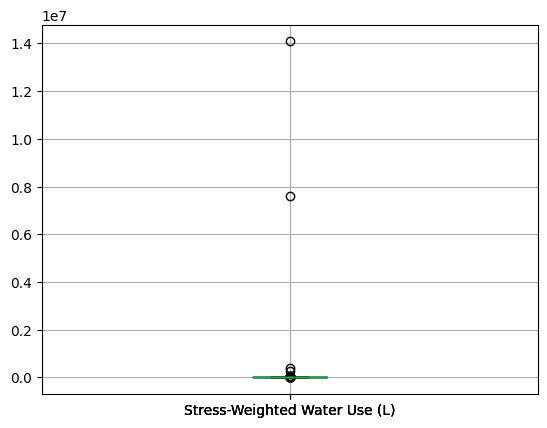

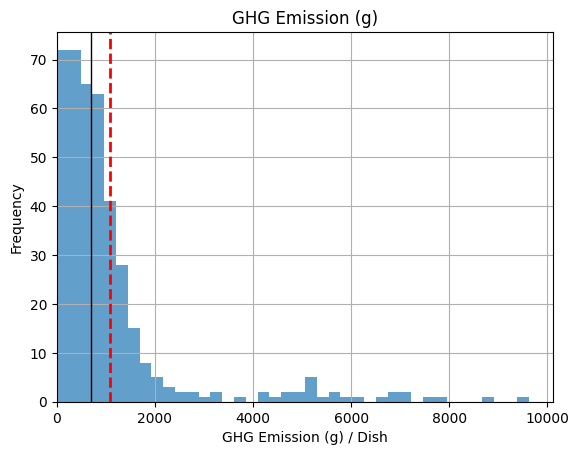

In [75]:
Products_filtered = Products[Products['GHG Emission (g)'] < Products['GHG Emission (g)'].quantile(0.99)]
Products_filtered.hist(column=['GHG Emission (g)'], bins=40, alpha=0.7)
plt.axvline(Products_filtered['GHG Emission (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label='mean')
plt.axvline(Products_filtered['GHG Emission (g)'].median(), color='k', linewidth=1, label='median')
plt.xlabel('GHG Emission (g) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
# plt.savefig(path + 'filtered_GHGe_dish.png')
plt.show()


In [76]:
# Products.hist(column=['GHG Emission (g) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['GHG Emission (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['GHG Emission (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('GHG Emission (g) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'GHGe_100g.png')
# plt.show()

# Using isna() or isnull() to find NaN values in 'GHG Emission (g) / 100g' column
rows_with_nan = Products[Products['GHG Emission (g) / 100g'].isna()]

# Display the rows containing NaN values
print(rows_with_nan)


Empty DataFrame
Columns: [ProdId, Description, SalesGroup, Weight (g), GHG Emission (g), N lost (g), Land Use (m^2), Freshwater Withdrawals (L), Stress-Weighted Water Use (L), GHG Emission (g) / 100g, N lost (g) / 100g, Freshwater Withdrawals (L) / 100g, Stress-Weighted Water Use (L) / 100g, Land Use (m^2) / 100g]
Index: []


In [77]:
# Products.hist(column=['N lost (g)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['N lost (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['N lost (g)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('N lost (g) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'N lost_dish.png')
# plt.show()

In [78]:
# Products.hist(column=['N lost (g) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['N lost (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['N lost (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('N lost (g) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'N lost_100g.png')
# plt.show()

In [79]:
# Products.hist(column=['Freshwater Withdrawals (L)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Freshwater Withdrawals (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Freshwater Withdrawals (L)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Freshwater Withdrawals (L) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Fresh water_dish.png')
# plt.show()

In [80]:
# Products.hist(column=['Freshwater Withdrawals (L) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Freshwater Withdrawals (L) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Fresh water_100g.png')
# plt.show()

In [81]:
# Products.hist(column=['Stress-Weighted Water Use (L)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Stress-Weighted Water Use (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Stress-Weighted Water Use (L)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Stress-Weighted Water Use (L) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Stress water_dish.png')
# plt.show()

In [82]:
# Products.hist(column=['Stress-Weighted Water Use (L) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Stress-Weighted Water Use (L) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Stress water_100g.png')
# plt.show()

In [83]:
# Products.hist(column=['Land Use (m^2)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Land Use (m^2)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Land Use (m^2)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Land Use (m^2) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Land_Use_(m^2).png')
# plt.show()

In [84]:
# Products.hist(column=['Land Use (m^2) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Land Use (m^2) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Land Use (m^2) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Land Use (m^2) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Land_Use_(m^2)_per_100g.png')
# plt.show()

In [85]:
# Products.to_csv('C:/Users/ENTER_HERE/CFFS-S23/CFFS-22-23/data/preprocessed/Products_List.csv', index = False)